In [1]:
using Plots, PlotRecipes
using LaTeXStrings

    +(AbstractArray

# Tarea 3

### Ejercicio 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?

In [2]:
function FdeX(x)
    f = x^2 - 2
    return f
end;    

, DataArrays.DataArray

In [3]:
n = 100
Datos1 = [0]
Datos2 = [0.1]
Datos3 = [0.001]
for i in 2:n
    x = FdeX(Datos1[i-1])
    push!(Datos1,x)
    x = FdeX(Datos2[i-1])
    push!(Datos2,x)
    x = FdeX(Datos3[i-1])
    push!(Datos3,x)
end    

) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:276
is ambiguous with: 
    +

[Plots.jl] Initializing backend: pyplot


(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at C:\Users\Franco\.julia\v0.4\DataArrays\src\operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at C:\Users\Franco\.julia\v0.4\WoodburyMatrices\src\SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.



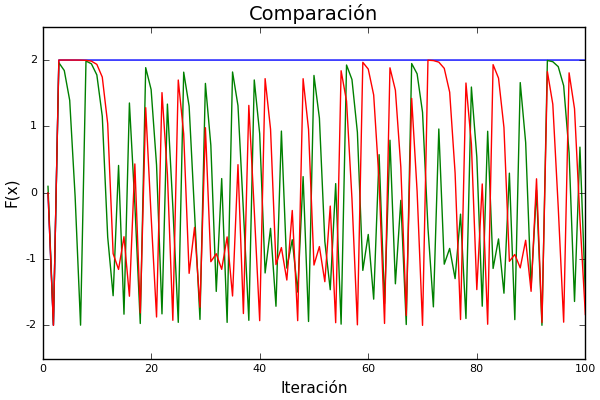

In [4]:
plot(   xaxis=("Iteración", (0,100)),
        yaxis=("F(x)",(-2.5,2.5)),
        legend=false, title="Comparación", grid=false)

plot!(Datos1, color=(:blue))
plot!(Datos2, color=(:green))
plot!(Datos3, color=(:red))

La función tiene un punto atractor en 2.

### Ejercicio 2

Escriban una función que, con los argumentos `F` para el mapeo, `x0` para la condición inicial y `n` para el número de iterados del mapeo (un número entero), genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

In [5]:
F(x)=sqrt(x);

In [6]:
function IteradorDeEntesAbstractos(f,n,x0,MinX,MaxX,MinY,MaxY)
    rangox = MinX:0.01:MaxX
    VectorX = Float64[]
    VectorY = Float64[]
    push!(VectorX,x0)
    push!(VectorX,x0)
    y = f(VectorX[1])
    push!(VectorY,x0)
    push!(VectorY,y)
    for i in 3:2:n
        push!(VectorX,VectorY[i-1])
        push!(VectorX,VectorY[i-1])
        push!(VectorY,VectorY[i-1])
        push!(VectorY,f(VectorX[i-1]))
    end
    plot(rangox, f, 
    xaxis=(L"x", (MinX:MaxX)), 
    yaxis=(L"F(x)", (MinY:MaxY)), 
        legend=false, grid=false)
    
    plot!(rangox, x->x, color=:red) 
    plot!(VectorX,VectorY, line=(:green, :path, 2.0, :dot), marker=(:point, 0.5))
end           

IteradorDeEntesAbstractos (generic function with 1 method)


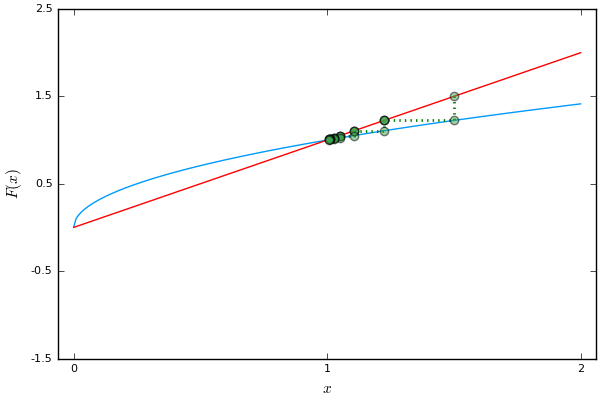

In [9]:
IteradorDeEntesAbstractos(F,25,1.5,0.0,2.0,0.0,2.0)

### Ejercicio 3

Usen el análisis para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. 

In [8]:
function H(x)
    g = x^2 - 1.1
    return g
end

H (generic function with 1 method)


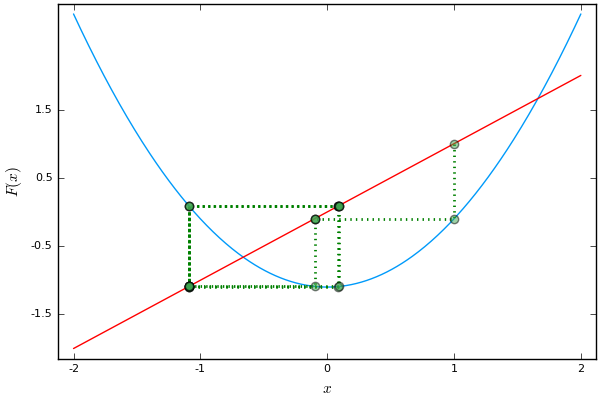

In [17]:
IteradorDeEntesAbstractos(H,25,1.0,-2.0,2.0,-1.5,2.0)

### Ejercicio 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

1. $F_1(x) = \frac{1}{3x}$.

2. $F_2(x) = -\frac{x^5}{5}$.

3. $F_3(x) = \frac{x}{2}-2$.

In [18]:
function F1(x)
    f1 = 1 / (3.0 * x)
    return f1
end

function F2(x)
    f2 = -0.2 * x^5
    return f2
end

function F3(x)
    f3 = 0.5 * x - 2.0
    return f3
end

F3 (generic function with 1 method)

In [64]:
function IteradorDeEntesAbstractosV2(f,n,CondicionesIniciales,MinX,MaxX,MinY,MaxY)
    rangox = MinX:0.01:MaxX
    plot(rangox, f, 
        xaxis=(L"x", (MinX:MaxX)), 
        yaxis=(L"F(x)", (MinY:MaxY)), 
        legend=false, grid=false)
    plot!(rangox, x->x, color=:red) 
    
    for x in CondicionesIniciales
        VectorX = Float64[]
        VectorY = Float64[]
        push!(VectorX,x)
        push!(VectorX,x)
        y = f(VectorX[1])
        push!(VectorY,x)
        push!(VectorY,y)
        for i in 3:2:n
            push!(VectorX,VectorY[i-1])
            push!(VectorX,VectorY[i-1])
            push!(VectorY,VectorY[i-1])
            push!(VectorY,f(VectorX[i-1]))
        end
        plot!(VectorX,VectorY, line=(:path, 2.0, :dot), marker=(:point, 0.5))
    end
end           

IteradorDeEntesAbstractosV2 (generic function with 1 method)

In [65]:
IteradorDeEntesAbstractosV2(F1,25,[2.0,1.0,-1.0,-2.0],-5.0,5.0,-5.0,5.0)

### Ejercicio 5

Para el mapeo mismo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$
(ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de 20,000 iterados. Obtengan el histograma de frecuencia de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

### Ejercicio 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$.

### Ejercicio 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.